In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from BoardLoader import BoardLoader
from Display import GUIView
from BoardSolver import BoardSolver

In [2]:
# boards = ["beginner", "beginner_broken", "intermediate", "advance", "expert"]
# algorithms = ["bfs", "dfs", "astar"]
# heuristics = ["null", "distance", "blocking", "distance_and_blocking"]
boards = ["beginner"]
algorithms = ["bfs", "astar"]
heuristics = ["null", "distance"]

loaded_boards = {name: BoardLoader.load(f"boards/{name}.txt") for name in boards}
display = GUIView()
results = pd.DataFrame(columns=["board", "algorithm", "heuristic", "time", "moves"])
solutions = {}

In [3]:
def run_experiment(board_name, board, algorithm, heuristic):
    """Run the experiment."""
    solver = BoardSolver(board, algorithm, heuristic)
    time_delta = solver.solve()
    print(f"Algorithm: {algorithm}, Heuristic: {heuristic}")
    results.loc[len(results)] = {
                    "board": board_name,
                    "algorithm": algorithm,
                    "heuristic": heuristic,
                    "time": time_delta,
                    "moves": len(solver.solution),
                }
    solutions[(board_name, algorithm, heuristic)] = (solver, solver.solution, time_delta)

def display_results(solver, solution, time_delta, save_location=None):
    """Display the solution and statistics."""
    if solution:
        grids = solver.from_moves_to_grids(solution)
        possible_moves = [solver.get_states(grid) for grid in grids]
        display.show_solution(solver.game_board, grids, possible_moves, save_location)
        display.show_statistics(time_delta, solver.expanded_nodes, len(solution))
    else:
        print("No solution found!")
        display.show_statistics(time_delta, solver.expanded_nodes)

In [4]:
for board_name, board in loaded_boards.items():
    print(f"Board: {board_name}")
    for algorithm in algorithms:
        if algorithm == "astar":
            for heuristic in heuristics:
                run_experiment(board_name, board, algorithm, heuristic)
        else:
            run_experiment(board_name, board, algorithm, None)

Board: beginner
Algorithm: bfs, Heuristic: None


TypeError: object of type 'NoneType' has no len()

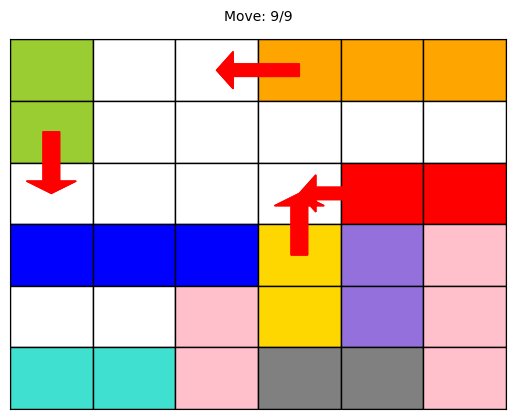



Statistics:

Amount of Moves: 9

Time Passed: 5.529 seconds

Expanded Nodes: 1590



<Figure size 640x480 with 0 Axes>

In [ ]:
display_results(*solutions[("beginner", "bfs", None)], "figures/beginner_bfs.gif")

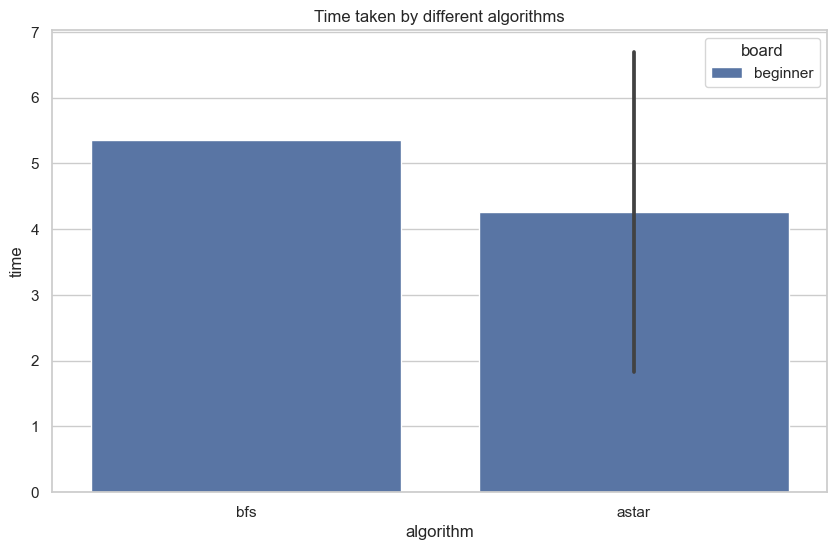

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="algorithm", y="time", hue="board", data=results)
plt.title("Time taken by different algorithms")
plt.show()

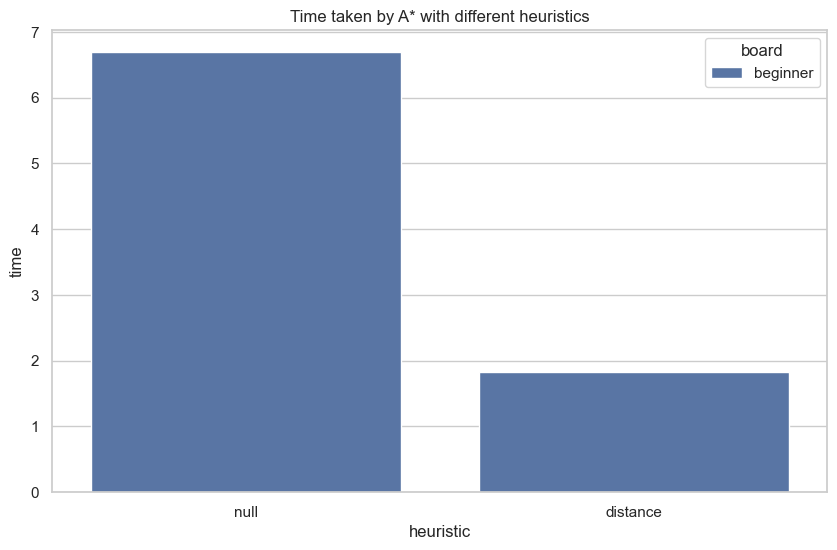

In [ ]:
#plot astar with diffrent heuristics

plt.figure(figsize=(10, 6))
sns.barplot(x="heuristic", y="time", hue="board", data=results[results["algorithm"] == "astar"])
plt.title("Time taken by A* with different heuristics")
plt.show()
